<a href="https://colab.research.google.com/github/Gaurav2912/Customer-Segmentation-/blob/main/Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [102]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import scipy as sp

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set default gridtype, fontsize and palette
sns.set_style("darkgrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17', '#7C4DFF'])
plt.rcParams['font.size'] = 14

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/capstone project/Customer Segmentation/'
# df= pd.read_excel(path + 'Online Retail.xlsx')
df= pd.read_csv(path + 'Online Retail.csv')  # pandas can read csv file faster compare to xlsx file 

In [5]:
df2= pd.read_csv(path + 'Online Retail.csv') 

In [6]:
#checking top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [7]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [8]:
#checking shape of dataset
df.shape

(541909, 8)

* dataframe have 8 rows and 541909 columns

In [9]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
# checking for unique values
df.nunique().sort_values()

Country           38
Quantity         722
UnitPrice       1630
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

## **Data Cleaning**

In [11]:
# Checking for duplicate values
df.duplicated().sum()

5268

In [12]:
# dropping duplicate values
df = df.drop_duplicates()

In [13]:
# Checking for duplicate values
df.duplicated().sum()

0

**Checking for null values**

In [14]:
# checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# checking for null values in dataset in terms of percentage
100 * df.isnull().sum() / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

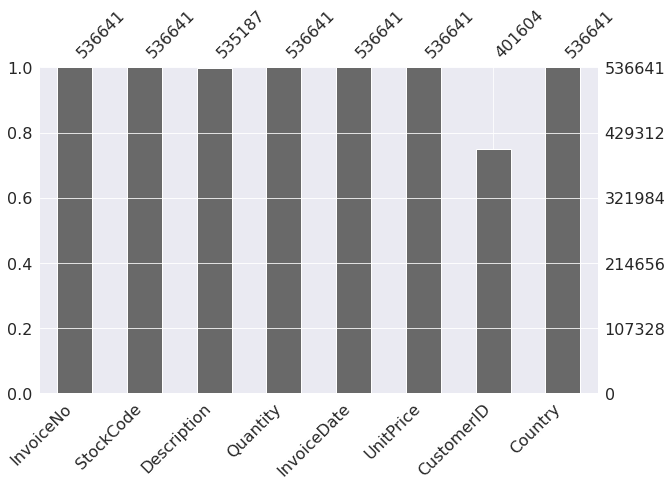

In [16]:
# Visualize the number of missing
# values as a bar chart
plt.figure()
msno.bar(df, figsize= (10,6));

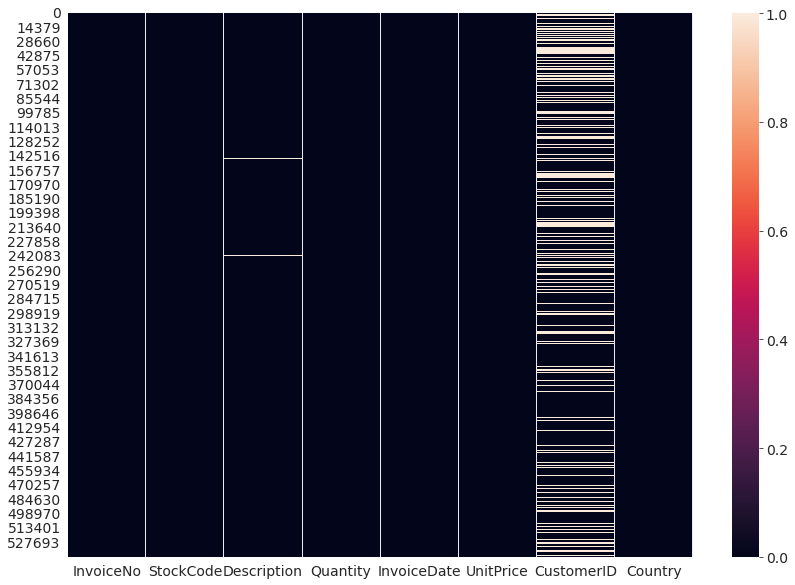

In [17]:
# Visualize missing values as a matrix
plt.figure(figsize= (14,10))
sns.heatmap(df.isnull());

* As we can see that almost 25 percent of the data in Customer ID are missing and Description have only 0.26 percent of missing data.
* If the customer id would be unique for each observation, I would have removed it but it has 4372 unique values, out of 406829 non-null observations, it seems to be the important feature for clustering, so I am keeping this column. 
* But for making customer segmenttation these null values should be removed.

In [18]:
# dropping all  null values
df.dropna(inplace=True)   

In [19]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

All missing values are gone.

---
Statistical summary 

In [20]:
# statistical summary of non numerical features dataframe
df.describe(include= np.object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,20460,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11/14/11 15:27,United Kingdom
freq,542,2065,2058,543,356728


In [21]:
# statistical summary of numeric features in dataframe
df.describe(percentiles = [.1, .25, .5, .75, .9])

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
10%,1.000000,0.550000,12867.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
90%,24.000000,6.750000,17716.000000
max,80995.000000,38970.000000,18287.000000


* The maximum values in the Quantity and Unit price columns are far from the general trend.
* The minimum value of these feature should be zero, can not be negative.

Let's explore negative values

In [22]:
df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


* It seems that these negative values correspond to a canceled transaction.

I am selecting only positive values for Quantity and non negative values for UnitPrice

In [23]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] >= 0)]

In [24]:
# Let's check all canceled transactions
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


All canceled transactions are also gone.

In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [26]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [27]:
old_num_rows = 541909
new_num_rows = df.shape[0]

percent_removal = 100 * (old_num_rows - new_num_rows) / old_num_rows
print(f"After data cleaning {round(percent_removal, 2)} % of rows in dataframe are gone") 

After data cleaning 27.53 % of rows in dataframe are gone


# Feature Engineering



In [28]:
# New column for Total Price which is product of Quantity and UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

Extract part of date

* Year
* Month
* Day
* Weekday
* Hour

And also create a column index with the minimum invoice date aka first time customer was acquired.

[pandas.DataFrame.transform Documentation ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [29]:
# Convert InvoiceDate to datetime object
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])

# groupby customerID  take InvoiceDate and take minimum of InvoiceDate  
df['CohortDate'] =  df.groupby('CustomerID')['InvoiceDate'].transform('min')
# For cohort date we need only year and month  

df['CohortDate'] =  df['CohortDate'].apply(lambda x: datetime(x.year, x.month, 1)) # add as 1 as %d  because we are intrested in month and year only 

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CohortDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-08-01


In [30]:
def add_year_month(df,col):
  """Extract then create  Month and Year Column"""
  df[col+'_Year'] = df[col].dt.year               # Extract and create year 
  df[col+'_Month'] = df[col].dt.month             # Extract and create month in numerical format


def add_dateparts(df, col):
  """
  Extract then create  MonthName, Day, Weekday and WeekdayName and Hour.
  """
  df['MonthName'] = df[col].dt.month_name()      # Extract and create month name
  df['Day'] = df[col].dt.day                    # Extract and create day in numerical fromat 
  df['WeekdayName'] = df[col].dt.day_name()     # Extract and create weekday  name
  df['Weekday'] = df[col].dt.weekday             # Extract and create weekday in number
  df['Hour'] = df[col].dt.hour                  # Extract and create hour

In [31]:
# add year and month for Invoice and cohort date
add_year_month(df,'InvoiceDate')
add_year_month(df,'CohortDate')

# add other dateparts  with "InvoiceDate" columns only
add_dateparts(df, 'InvoiceDate')

In [32]:
def map_quarter(month_num):
  '''
  A quarter is a three-month period on a company's financial calendar, this function return quarter of that month.
  '''
  # January, February, and March 
  if month_num <  4: 
    return 'Q1'
  # April, May, and June
  if month_num < 7:
    return 'Q2'
  # July, August, and September
  if month_num < 10:
    return 'Q3'
  # October, November, and December 
  return 'Q4'


def time_type(time):
  """
  return 'Morning', 'Afternoon', 'Evening' and 'Night' based on timing.
  """
  # Morning is from sunrise to 11:59 AM. Sunrise typically occurs around 6 AM.
  if 6 <= time <  12: 
    return 'Morning'
  # Afternoon is from 12:01 PM to around 5:00 PM, Noon is at 12:00 PM.
  if 12<= time < 17:
    return 'Afternoon'
  # Evening is from 5:01 PM to 8 PM, or around sunset.
  if 17 <= time <= 20:
    return 'Evening'
  # Night is from sunset to sunrise, so from 8:01 PM until 5:59 AM.
  return 'Night' 

In [98]:
# create column for weekend
# df['Weekend'] = df['Weekday'].apply(lambda x: True if x in [5,6] else False)  
#  or faster method
def weekend_func(x) : return True if x in [5,6] else False
df['Weekend'] = np.vectorize(weekend_func)(df['Weekday'])

# To create quarter column
# df['Quarter'] =  df.apply(lambda x : map_quarter(x['InvoiceDate_Month']), axis= 1)
df['Quarter'] = np.vectorize(map_quarter)(df['InvoiceDate_Month'])

#  TimeType column
# df['TimeType'] =  df.apply(lambda x : time_type(x['Hour']), axis= 1)
df['TimeType'] = np.vectorize(time_type)(df['Hour'])

In [34]:
# diffrence of Year and Month
year_diff = df['InvoiceDate_Year'] - df['CohortDate_Year']
month_diff = df['InvoiceDate_Month'] - df['CohortDate_Month']

# create a cohort index , 12 month in year with month 
df['CohortPeriod'] = 12 * year_diff + month_diff 

df.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
TotalPrice,15.3,20.34,22.0,20.34,20.34
CohortDate,2010-12-01 00:00:00,2010-12-01 00:00:00,2010-12-01 00:00:00,2010-12-01 00:00:00,2010-12-01 00:00:00


In [35]:
df.tail().T

,541904,541905,541906,541907,541908
InvoiceNo,581587,581587,581587,581587,581587
StockCode,22613,22899,23254,23255,22138
Description,PACK OF 20 SPACEBOY NAPKINS,CHILDREN'S APRON DOLLY GIRL,CHILDRENS CUTLERY DOLLY GIRL,CHILDRENS CUTLERY CIRCUS PARADE,BAKING SET 9 PIECE RETROSPOT
Quantity,12,6,4,4,3
InvoiceDate,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00
UnitPrice,0.85,2.1,4.15,4.15,4.95
CustomerID,12680.0,12680.0,12680.0,12680.0,12680.0
Country,France,France,France,France,France
TotalPrice,10.2,12.6,16.6,16.6,14.85
CohortDate,2011-08-01 00:00:00,2011-08-01 00:00:00,2011-08-01 00:00:00,2011-08-01 00:00:00,2011-08-01 00:00:00


# EDA
-----
It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 
____
let's do some exploration and visulization for different - different  data.

In [36]:
# count the unique customer ID by grouping by Cohort Month  and Cohort Index 
cohort_df = df.groupby(['CohortDate','CohortPeriod'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_df.rename(columns = {'CustomerID':'CustomerCount'}, inplace = True)
cohort_df

,CohortDate,CohortPeriod,CustomerCount
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,324
89,2011-11-01,1,36


### **Cohort Analysis**

Cohort Retention is an important measurement that reflects a business's health. Retention metric is often analyzed across groups of customers that share some common properties, hence the name Cohort Retention Analysis. Cohort Retention Analysis is a powerful technique that every business owner should know.

![](https://d35fo82fjcw0y8.cloudfront.net/2016/03/03210554/table1a2.png)

In [37]:
# create a pivot table 
cohort_table = cohort_df.pivot(index='CohortDate', columns=['CohortPeriod'],values='CustomerCount')

# change index format
cohort_table.index = cohort_table.index.strftime('%B %Y')

# creating last column which is sum of all user 
cohort_table.loc["All Customers"] = cohort_table.sum(axis= 0)  # sum across axis = 0

cohort_table

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortDate,,,,,,,,,,,,,
December 2010,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
January 2011,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
February 2011,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
March 2011,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
April 2011,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
May 2011,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
June 2011,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# retention_table In form of percentage

# grab the 1st CohortPeriod of all months from  using cohort_table.iloc[:,0]
retention_table =  round(cohort_table.divide(cohort_table.iloc[:,0], axis=0), 3)
retention_table

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortDate,,,,,,,,,,,,,
December 2010,1.0,0.366,0.323,0.384,0.363,0.398,0.363,0.349,0.354,0.395,0.374,0.503,0.266
January 2011,1.0,0.221,0.266,0.230,0.321,0.288,0.247,0.242,0.300,0.326,0.365,0.118,NaN
February 2011,1.0,0.187,0.187,0.284,0.271,0.247,0.253,0.279,0.247,0.305,0.068,NaN,NaN
March 2011,1.0,0.150,0.252,0.199,0.223,0.168,0.268,0.230,0.279,0.086,NaN,NaN,NaN
April 2011,1.0,0.213,0.203,0.210,0.197,0.227,0.217,0.260,0.073,NaN,NaN,NaN,NaN
May 2011,1.0,0.190,0.173,0.173,0.208,0.232,0.264,0.095,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.174,0.157,0.264,0.231,0.335,0.095,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.181,0.207,0.223,0.271,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.207,0.249,0.243,0.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


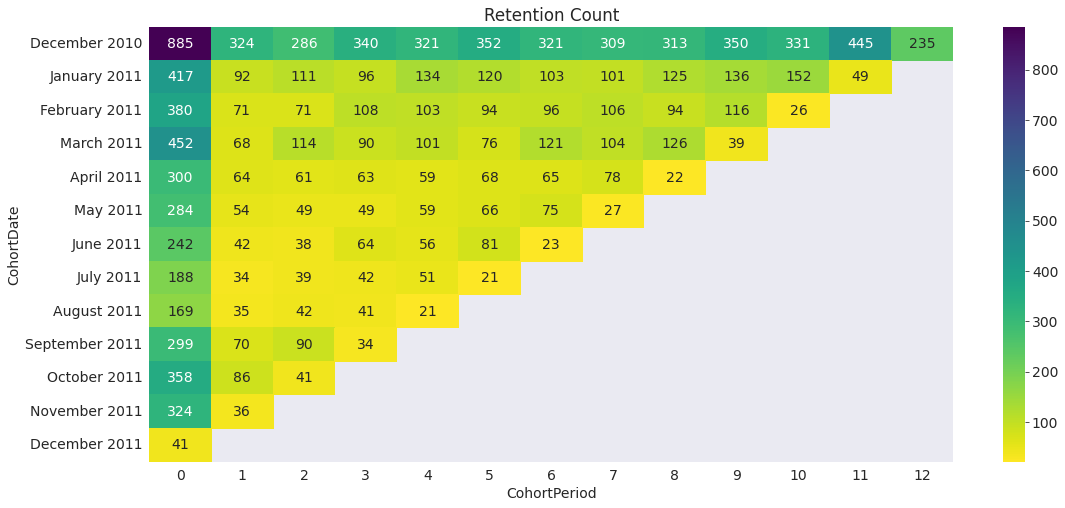

In [39]:
#visualize our results in heatmap for Retention Count
plt.figure(figsize=(18,8))
# Removing all clients sum because the color scaling is distorted, if u wnt to see than see it in table
sns.heatmap(cohort_table.iloc[:-1],annot=True, cmap= 'viridis_r', fmt='.4g').set_title("Retention Count");

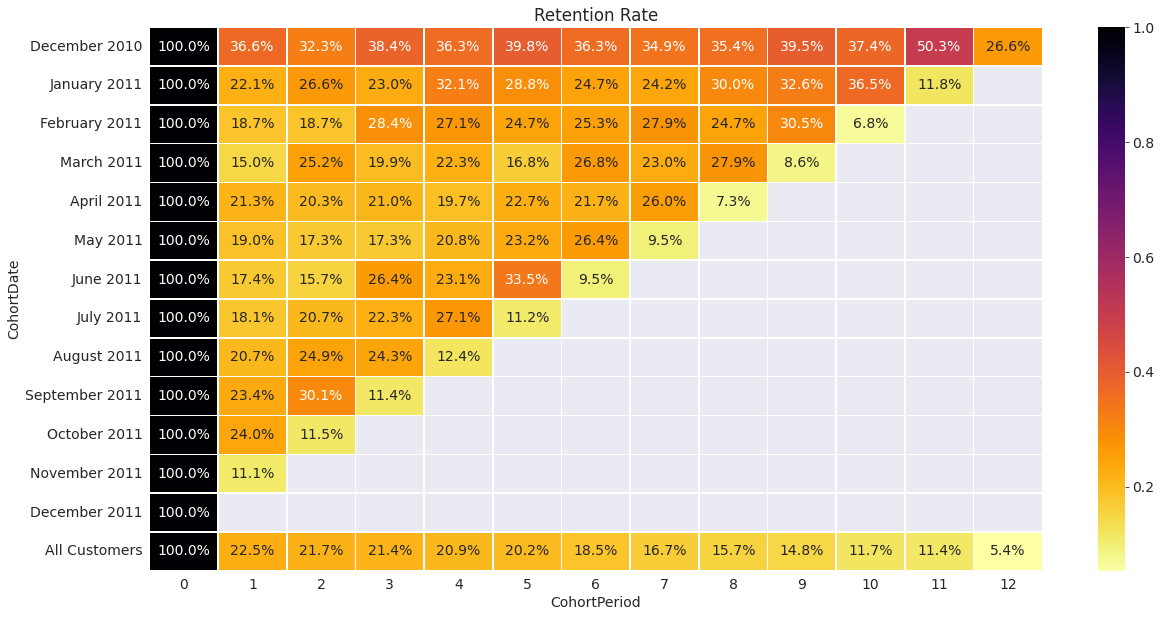

In [40]:
# visualize our results in heatmap Retention Rate

plt.figure(figsize=(20,10))
sns.heatmap(retention_table, annot=True,  fmt = '.1%', cmap= 'inferno_r', linewidth= .5).set_title("Retention Rate");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* The Rows represent Activity that is month of Acquision
* Column represent Retention ie. Month since acquision.

>*How to Interpret retention table*
- On December 2010 there were 885 new customers out of which 334 customers which is 36.6% of 885 remains in next month and so on.. 
- 300 new customers added in April 2011, 19.7% of 300 i.e. 59 customers were retained after 4 months (August 2011) .
- How many overall customers in March 2011 ? 
  - 452 + 71 + 111 + 340 = 974

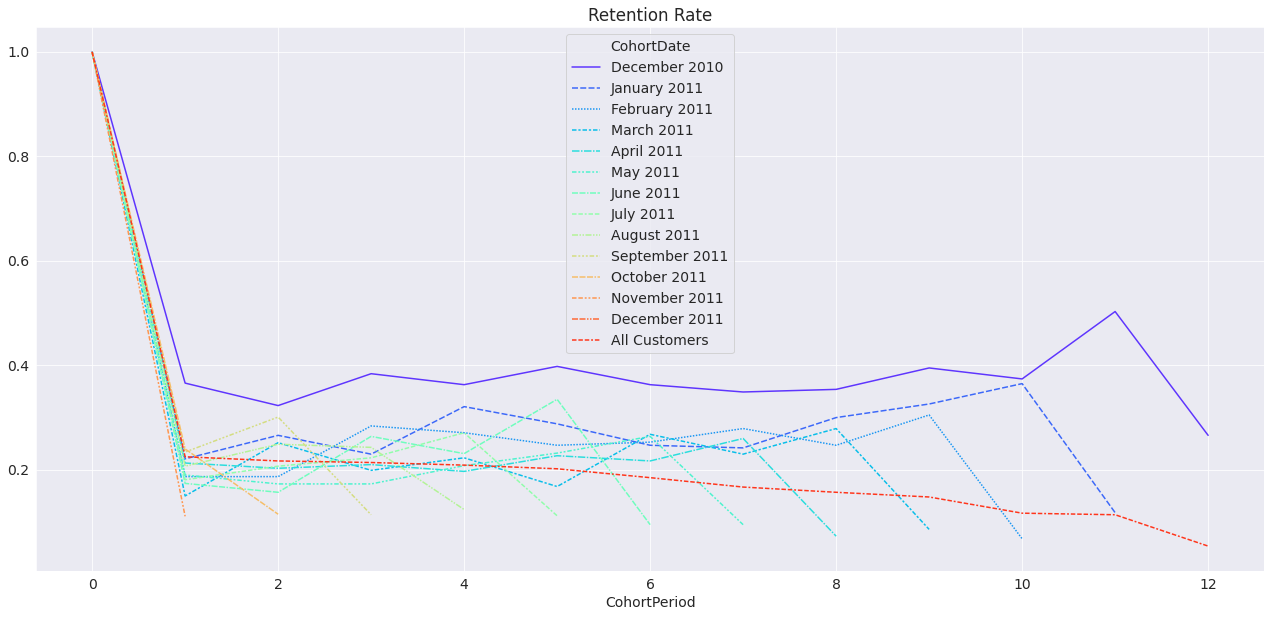

In [41]:
# line plot
plt.figure(figsize= (22,10))
sns.lineplot(data=retention_table.T, palette= 'rainbow').set_title("Retention Rate");

- The graph of retention rate for all users is monotonically decreasing, while the graph for cohort dates from December 2010 to September 2011 is not monotonic in nature.

**Bar plot**
* Products with its Frequency
* Products with number of items sold
* Products with TotalPrice
* Most expencive Products.  

----


In [42]:
# define some functions

def percentage_calulator(series_name):
  """Calculate and return percentage value per item in given series."""

  return 100 * series_name / series_name.sum()


def horizontal_nbar(series_name, title_str, palette= None, percentage= True, count= True, n= 10, figsize_tup= (12,7)):
  """
  Plot bar graph for top n product in given series.
  """
 
  plt.figure(figsize= figsize_tup)
  
  item_names = series_name[:n].index     # grab the index
  item_values = series_name[:n].values   # grab the values 

  # barplot
  sns.barplot(x= item_values, y= item_names, 
            palette= palette).set_title(title_str)

  # calulate percentage
  percent_item = percentage_calulator(series_name)

  plt.xlabel("count")

  # To write text on each bar of the bar plot
  for i in range(n):
    # x is position of text on x-axis, s is value that have to write on plot
    if percentage:   # do you want to write percentage
    # percent values
      plt.text(y= i + 0.2,x = item_values[i], s= str(round(percent_item[i],2)) + " %", 
              fontsize=15, color='black')
    
    # actual value
    if count:   # do you want to write count
      plt.text(y= i + 0.1, x = min(item_values) / 10, s= round(item_values[i],2),   
              fontsize=15, color='white')
      

In [43]:
def vertical_barplot(column, title_str,  palette= None, figsize_tup= (14,7), 
                     font_size= 12, line= True, percentage= True, dtframe= df):
  """
  Plot bar graph for categorical variable.
  """
 
  plt.figure(figsize= figsize_tup)

  # sort value of that column
  column_count = dtframe[column].value_counts()
  item_index = column_count.index
  item_values = column_count.values


  # barplot
  sns.barplot(y= item_values, x= item_index, 
            palette= palette).set_title(title_str)

  # lineplot
  # white line
  if line:
    sns.lineplot(x= item_index, y= item_values / 1.5 ,
                 color= 'white', marker= 'o')


  # calulate percentage
  percent_item = percentage_calulator(column_count)
  percent_item

  # To write text on each bar of the bar plot
  for i in range(len(item_index)):
    # y is position of text on y-axis, s is value that have to write on plot
    if percentage:   # do you want to write percentage
    # percent values
      plt.text(x= i - 0.3,y = item_values[i] + max(item_values) / 200 , s= str(round(percent_item[i],1)) + "%", 
              fontsize= font_size, color='black', weight='bold')
      

  plt.ylabel("count")
  plt.xlabel(column)
      

**Products with its Frequency**

In [44]:
prod_freq = df['Description'].value_counts()
prod_freq.head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

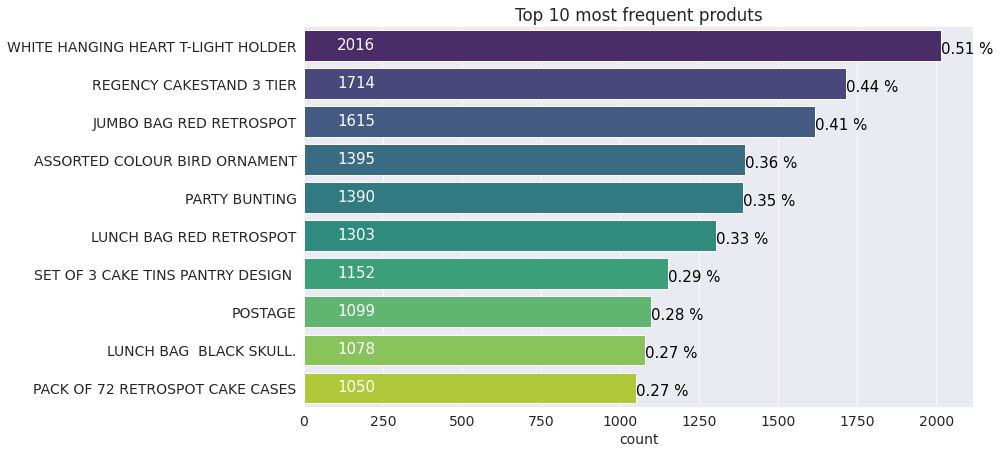

In [45]:
# Bar plot of Top 10 most frequent produts, white text is actual value and black text for percentage
horizontal_nbar(prod_freq, "Top 10 most frequent produts", 'viridis')

In [46]:
# least popular products with minimum values
prod_freq[prod_freq == min(prod_freq)]

BEADED LOVE HEART JEWELLERY SET        1
ANTIQUE RASPBERRY FLOWER EARRINGS      1
FIRE POLISHED GLASS BRACELET MONTAN    1
FLOWER GLASS GARLD NECKL36"TURQUOIS    1
BIG POLKADOT MUG                       1
                                      ..
GREEN WITH METAL BAG CHARM             1
WHITE WITH METAL BAG CHARM             1
BLUE/NAT SHELL NECKLACE W PENDANT      1
PINK EASTER HENS+FLOWER                1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, Length: 213, dtype: int64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 popular products are
- WHITE HANGING HEART T-LIGHT HOLDER   
- JUMBO BAG RED RETROSPOT              
- REGENCY CAKESTAND 3 TIER             
- PARTY BUNTING                        
- LUNCH BAG RED RETROSPOT              
- ASSORTED COLOUR BIRD ORNAMENT        
- SET OF 3 CAKE TINS PANTRY DESIGN     
- PACK OF 72 RETROSPOT CAKE CASES      
- LUNCH BAG  BLACK SKULL.              
- NATURAL SLATE HEART CHALKBOARD

213 products that are least popular, sold only once.

---
**Products with number of items sold**

In [47]:
prod_sold = df.groupby('Description')['Quantity'].sum().sort_values(ascending= False)
prod_sold.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

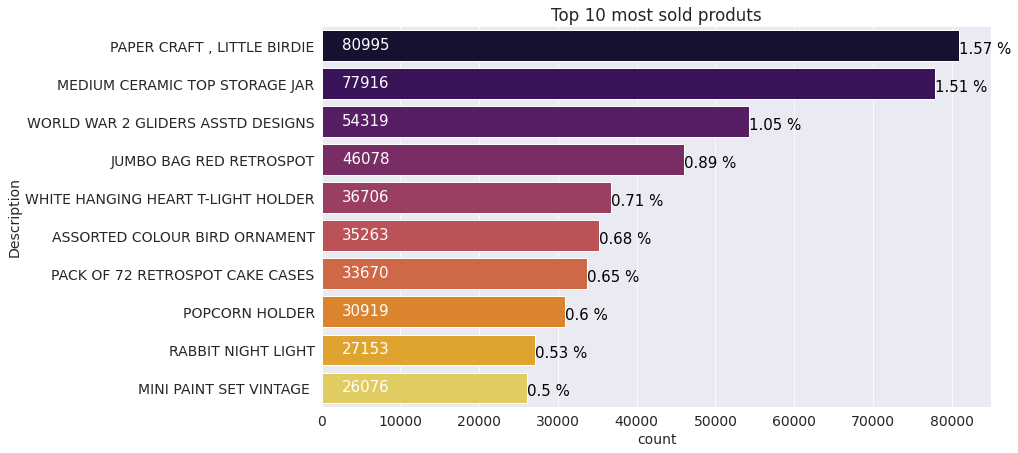

In [48]:
# Bar plot
horizontal_nbar(prod_sold, "Top 10 most sold produts", 'inferno')

In [49]:
# least sold products are
prod_sold[prod_sold == min(prod_sold)].head()

Description
FUNKY MONKEY MUG                    1
SET 36 COLOURING PENCILS DOILEY     1
SET/3 FLORAL GARDEN TOOLS IN BAG    1
PINK CRYSTAL GUITAR PHONE CHARM     1
BLUE PADDED SOFT MOBILE             1
Name: Quantity, dtype: int64

In [50]:
# total number of least sold products 
len(prod_sold[prod_sold == min(prod_sold)])

59

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 most sold produts
- PAPER CRAFT , LITTLE BIRDIE       
- MEDIUM CERAMIC TOP STORAGE JAR    
- WORLD WAR 2 GLIDERS ASSTD DESIGNS 
- JUMBO BAG RED RETROSPOT           
- WHITE HANGING HEART T-LIGHT HOLDER
- ASSORTED COLOUR BIRD ORNAMENT     
- PACK OF 72 RETROSPOT CAKE CASES   
- POPCORN HOLDER                    
- RABBIT NIGHT LIGHT                
- MINI PAINT SET VINTAGE            

59 products that are the least popular and only one item is sold.

---
**Products with TotalPrice**

In [51]:
prod_total_price = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending= False)   
prod_total_price.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64

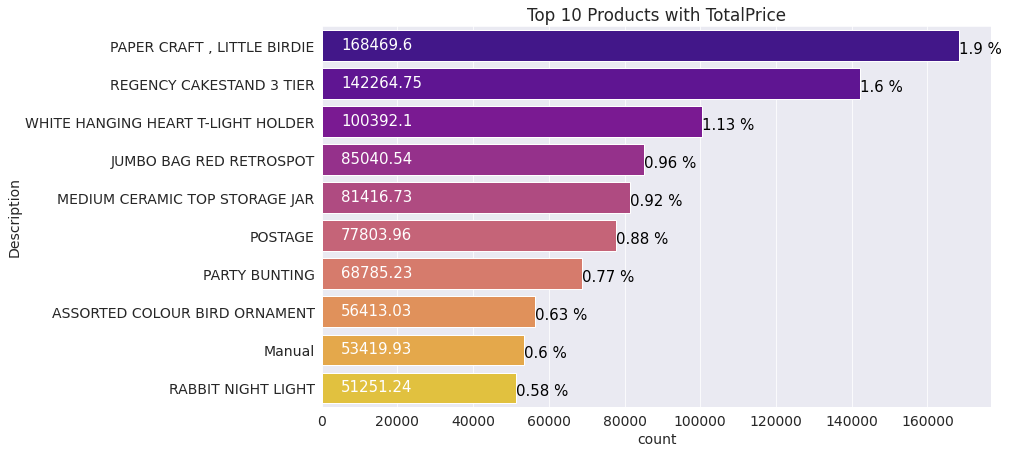

In [52]:
# Bar plot
horizontal_nbar(prod_total_price, "Top 10 Products with TotalPrice", 'plasma')

In [53]:
# bottom 10 products with with TotalPrice
prod_total_price.tail(10)

Description
PACK 4 FLOWER/BUTTERFLY PATCHES        1.250
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
CAT WITH SUNGLASSES BLANK CARD         0.950
PINK CRYSTAL GUITAR PHONE CHARM        0.850
PURPLE FRANGIPANI HAIRCLIP             0.850
VINTAGE BLUE TINSEL REEL               0.840
SET 12 COLOURING PENCILS DOILEY        0.650
HEN HOUSE W CHICK IN NEST              0.420
PADS TO MATCH ALL CUSHIONS             0.003
Name: TotalPrice, dtype: float64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 Products with TotalPrice
- PAPER CRAFT , LITTLE BIRDIE       
- REGENCY CAKESTAND 3 TIER          
- WHITE HANGING HEART T-LIGHT HOLDER
- JUMBO BAG RED RETROSPOT           
- MEDIUM CERAMIC TOP STORAGE JAR    
- POSTAGE                           
- PARTY BUNTING                     
- ASSORTED COLOUR BIRD ORNAMENT     
- Manual                            
- RABBIT NIGHT LIGHT                

>Bottom 10 products with with TotalPrice
- PACK 4 FLOWER/BUTTERFLY PATCHES    
- 60 GOLD AND SILVER FAIRY CAKE CASES
- HAPPY BIRTHDAY CARD TEDDY/CAKE     
- CAT WITH SUNGLASSES BLANK CARD     
- PINK CRYSTAL GUITAR PHONE CHARM    
- PURPLE FRANGIPANI HAIRCLIP         
- VINTAGE BLUE TINSEL REEL           
- SET 12 COLOURING PENCILS DOILEY    
- HEN HOUSE W CHICK IN NEST          
- PADS TO MATCH ALL CUSHIONS         

----

**Average Product Price per unit**

In [54]:
# Average Product Price per unit = Products with TotalPrice / Products with number of items sold
# Panda will take care of index, each value will divided based on corrosponding Description
avg_prod_price = prod_total_price / prod_sold     
avg_prod_price = avg_prod_price.sort_values(ascending= False)
avg_prod_price.head(10)

Description
DOTCOM POSTAGE                        744.147500
PICNIC BASKET WICKER 60 PIECES        649.500000
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    154.714286
REGENCY MIRROR WITH SHUTTERS          153.000000
VINTAGE BLUE KITCHEN CABINET          141.730769
VINTAGE RED KITCHEN CABINET           135.416667
CHEST NATURAL WOOD 20 DRAWERS         114.375000
LOVE SEAT ANTIQUE WHITE METAL         107.068966
SCHOOL DESK AND CHAIR                  63.144737
DECORATIVE HANGING SHELVING UNIT       59.950000
dtype: float64

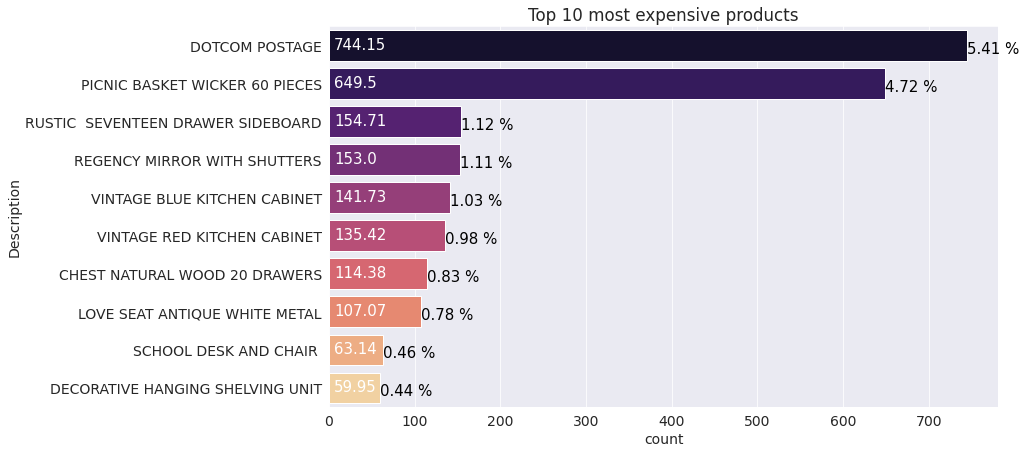

In [55]:
# Bar plot
horizontal_nbar(avg_prod_price, "Top 10 most expensive products", 'magma')

In [56]:
# bottom 10 cheap products
avg_prod_price.tail(10)

Description
WRAP BAD HAIR DAY                      0.100000
PIECE OF CAMO STATIONERY SET           0.096615
PORCELAIN BUDAH INCENSE HOLDER         0.092005
BLUE STONES ON WIRE FOR CANDLE         0.084062
LETTER SHAPE PENCIL SHARPENER          0.068498
CARTOON  PENCIL SHARPENERS             0.067340
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    0.065533
POPART WOODEN PENCILS ASST             0.042697
ASSTD DESIGN 3D PAPER STICKERS         0.028238
PADS TO MATCH ALL CUSHIONS             0.000750
dtype: float64

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

<br/>

>Top 10 Most Expensive Products
- DOTCOM POSTAGE                    
- PICNIC BASKET WICKER 60 PIECES    
- RUSTIC  SEVENTEEN DRAWER SIDEBOARD
- REGENCY MIRROR WITH SHUTTERS      
- VINTAGE BLUE KITCHEN CABINET      
- VINTAGE RED KITCHEN CABINET       
- CHEST NATURAL WOOD 20 DRAWERS     
- LOVE SEAT ANTIQUE WHITE METAL     
- SCHOOL DESK AND CHAIR             
- DECORATIVE HANGING SHELVING UNIT  

>10 cheapest products
- WRAP BAD HAIR DAY                  
- PIECE OF CAMO STATIONERY SET       
- PORCELAIN BUDAH INCENSE HOLDER     
- BLUE STONES ON WIRE FOR CANDLE     
- LETTER SHAPE PENCIL SHARPENER      
- CARTOON  PENCIL SHARPENERS         
- ESSENTIAL BALM 3.5g TIN IN ENVELOPE
- POPART WOODEN PENCILS ASST         
- ASSTD DESIGN 3D PAPER STICKERS     
- PADS TO MATCH ALL CUSHIONS            

-----
**StockCode Name**

In [57]:
# lets explore StockCode column
stock_freq = df['StockCode'].value_counts()
stock_freq.head(10)

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: StockCode, dtype: int64

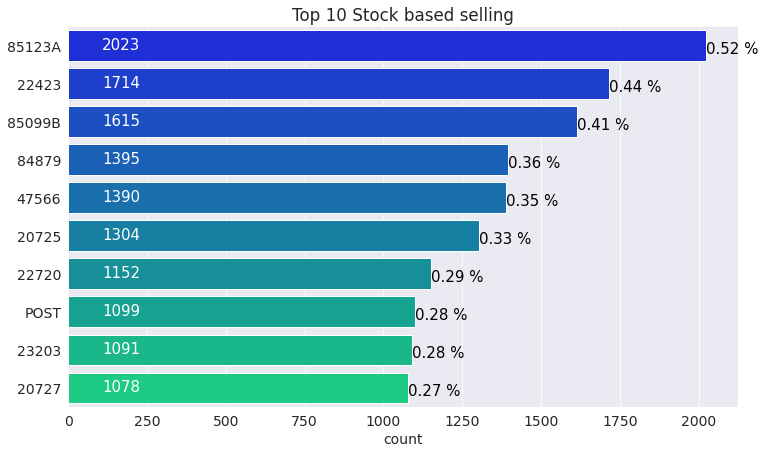

In [58]:
# Bar plot of Top 10 most frequent produts, white text is actual value and black text for percentage
horizontal_nbar(stock_freq, "Top 10 Stock based selling", 'winter')

In [59]:
# least popular Stock based selling
stock_freq[stock_freq == min(stock_freq)]

90102     1
84550     1
90214Z    1
37471     1
22034     1
         ..
20678     1
90059D    1
90168     1
90169     1
23843     1
Name: StockCode, Length: 167, dtype: int64

# Country feature

In [60]:
# lets check all unique country
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [61]:
# change 'EIRE' to 'Ireland' , 'RSA' to 'South Africa' and USA to United States
df['Country'] = df['Country'].replace(['EIRE', 'RSA', 'USA'], ['Ireland', 'South Africa', 'United States'])

In [62]:
# 
df_iso = pd.read_csv(path + 'ISO.csv')
df_iso.head()

,COUNTRY,ISO code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [63]:
# left join on two data frame
df = df.merge(df_iso,how='left', left_on='Country', right_on='COUNTRY')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CohortDate,...,Day,WeekdayName,Weekday,Hour,Weekend,Quarter,TimeType,CohortPeriod,COUNTRY,ISO code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,...,1,Wednesday,2,8,False,Q4,Morning,0,United Kingdom,GBR
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,1,Wednesday,2,8,False,Q4,Morning,0,United Kingdom,GBR
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,...,1,Wednesday,2,8,False,Q4,Morning,0,United Kingdom,GBR
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,1,Wednesday,2,8,False,Q4,Morning,0,United Kingdom,GBR
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,1,Wednesday,2,8,False,Q4,Morning,0,United Kingdom,GBR


In [64]:
# Lets explore country feature
country_count = df['Country'].value_counts()
country_count

United Kingdom          349227
Germany                   9027
France                    8327
Ireland                   7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
United States              179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
South Africa                58
Lebanon                     45
Lithuani

In [65]:
# Lets explore country feature
country_count = df['ISO code'].value_counts()
country_count

GBR    349227
DEU      9027
FRA      8327
IRL      7228
ESP      2480
NLD      2363
BEL      2031
CHE      1842
PRT      1453
AUS      1184
NOR      1072
ITA       758
FIN       685
CYP       603
SWE       450
AUT       398
DNK       380
POL       330
JPN       321
ISR       245
SGP       222
ISL       182
USA       179
CAN       151
GRC       145
MLT       112
ARE        68
ZAF        58
LBN        45
LTU        35
BRA        32
CZE        25
BHR        17
SAU         9
Name: ISO code, dtype: int64

In [66]:
data = dict(type='choropleth',
            locations = country_count.index[1:],
            z = country_count.values[1:],

            # text = df['text'],
            colorbar = {'title':"Millions USD"}
            ) 

layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

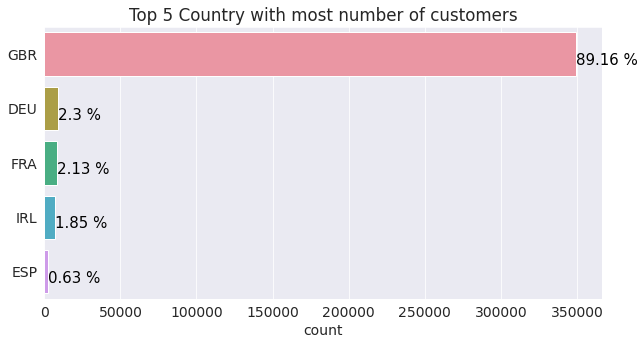

In [67]:
# Bar plot Top 5 Country with most number of customers
horizontal_nbar(series_name= country_count, title_str= "Top 5 Country with most number of customers", 
         palette= None, percentage= True, count= False, n= 5, figsize_tup= (10,5))

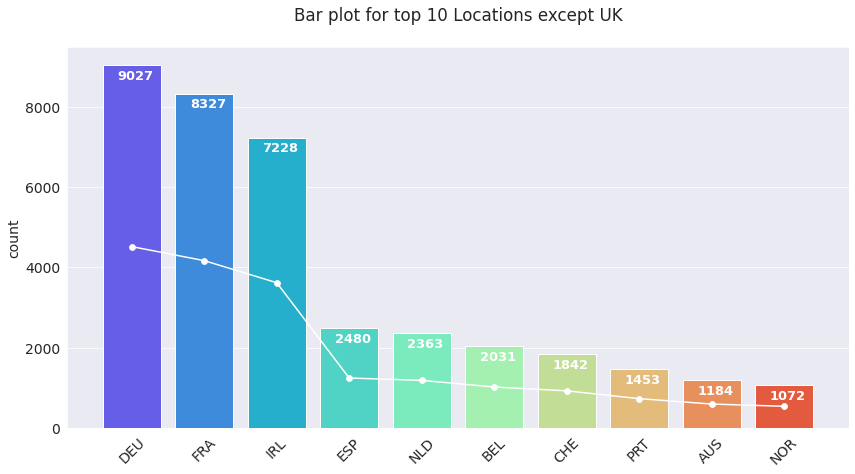

In [68]:
plt.figure(figsize= (14,7))

# Bar plot for top 10 Locations except UK
sns.barplot(x= country_count.iloc[1:11].index, y= country_count.iloc[1:11].values, palette= 'rainbow')

# white line
sns.lineplot(x= country_count.iloc[1:11].index, y= country_count.iloc[1:11].values / 2 , color= 'white', marker= 'o')


for i, value in enumerate(country_count.iloc[1:11].values):
  
  # To write text on each bar of the bar plot
  plt.text(x= i- 0.2, y= value - 350, s= value, 
            fontsize= 13, weight='bold', color= 'white')

plt.title('Bar plot for top 10 Locations except UK\n')
plt.ylabel("count")
plt.xticks(rotation= 45);

* Most countries are european

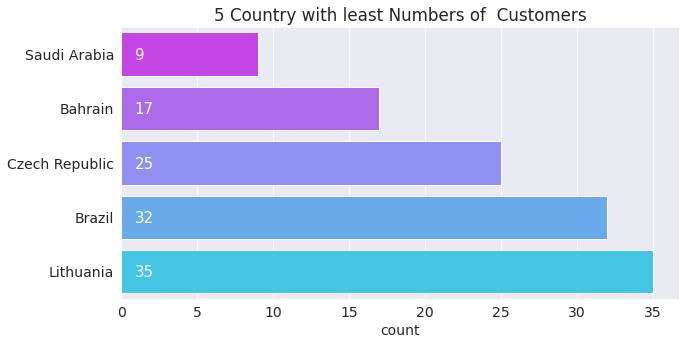

In [69]:
# plot bottom 5 country name
horizontal_nbar(series_name= df['Country'].value_counts(ascending= True), title_str= "5 Country with least Numbers of  Customers", 
         palette= 'cool_r', percentage= False, count= True, n= 5, figsize_tup= (10,5))

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

>Most of the customers are from
* United Kingdom         
* Germany                
* France                 
* Ireland                
* Spain                  

>Least number of customers from
* Lithuania              
* Brazil                 
* Czech Republic         
* Bahrain                
* Saudi Arabia   

241 customers from Unknown country.

----

**Months**

In [70]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'CohortDate',
       'InvoiceDate_Year', 'InvoiceDate_Month', 'CohortDate_Year',
       'CohortDate_Month', 'MonthName', 'Day', 'WeekdayName', 'Weekday',
       'Hour', 'Weekend', 'Quarter', 'TimeType', 'CohortPeriod', 'COUNTRY',
       'ISO code'],
      dtype='object')

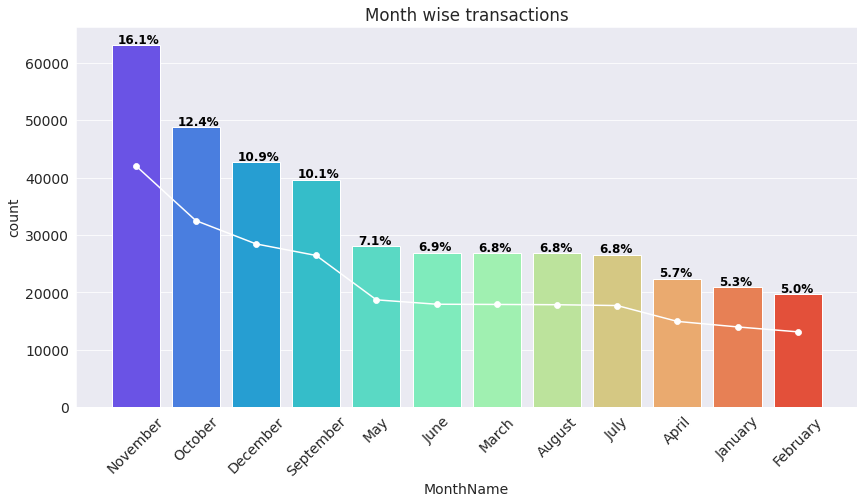

In [71]:
# barplot of month with transactions
vertical_barplot(column= "MonthName", title_str= "Month wise transactions",  palette= 'rainbow')
    
plt.xticks(rotation= 45);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

♦ *Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.*

♦ *Least numbers of purchasing are in the month of April and February.*

---
**Week Day**

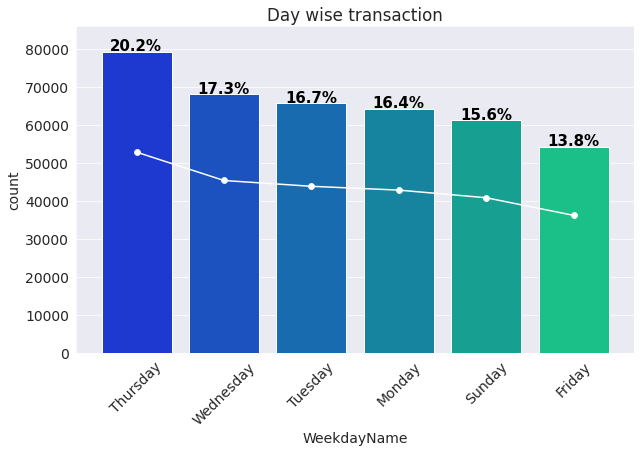

In [72]:
# barplot of month with transactions
vertical_barplot(column= "WeekdayName", title_str= "Day wise transaction",  palette= 'winter',
                  figsize_tup= (10,6), font_size= 15)

plt.xticks(rotation= 45)
plt.ylim(0, 86000);               # increase ylim to display percentage

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

- We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.

- Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.

-----
**Hour**

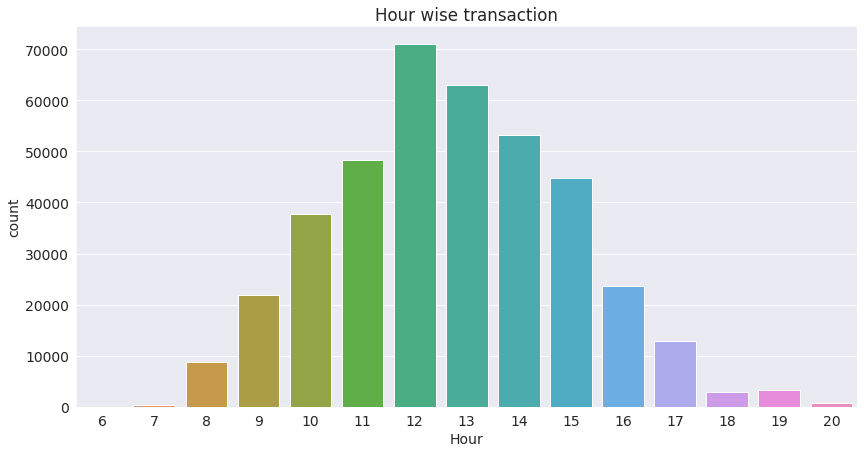

In [90]:
# barplot of month with transactions
 # convert to label  for this barplot
vertical_barplot(column= 'Hour', title_str= "Hour wise transaction", line= False, percentage= False)



* From the above graph we can say that most numbers of purchasing is done between 10am to 3pm, and at 12 pm transaction is at its peak.
-----

**Lets Analyse Weekend, Year, TimeType and Quarter**

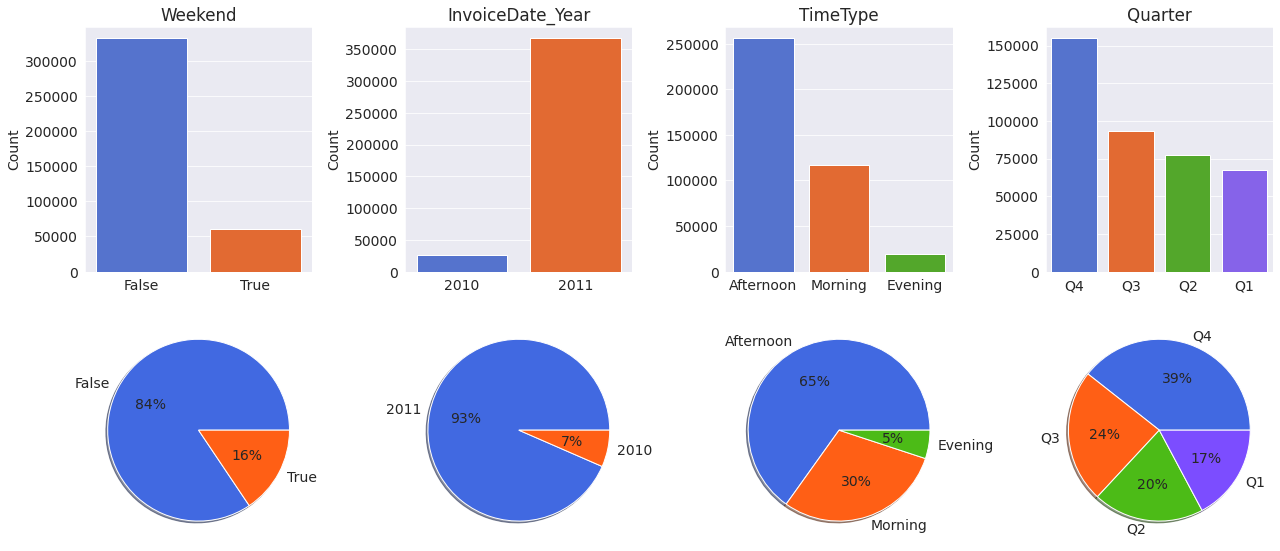

In [100]:
list_of_concern = ['Weekend', 'InvoiceDate_Year', 'TimeType', 'Quarter']

# create a blank canvas
fig, axes = plt.subplots(nrows= 2, ncols= 4, figsize= (18, 8))

df['Year'] = df['InvoiceDate'].astype(str)  

for i, col in enumerate(list_of_concern):

  col_index = df[col].value_counts().index
  col_val = df[col].value_counts().values
  # for I row to see count
  sns.barplot(x= col_index, y= col_val, ax= axes[0,i]).set_title(col)  # we can also use countplot
  axes[0,i].set_ylabel("Count")
  # piechart for II  row to see percentage
  axes[1,i].pie(df[col].value_counts(), labels = df[col].value_counts().keys(),
                autopct='%.0f%%', shadow=True)


plt.tight_layout();

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<br/>


**Insights:**

>Weekend
- *There are 2 weekend in a week, (2/7) which is 28.5% but here only weekend transaction is 16% means there is less purchase on weekend than other day.*

>Year
-  Most of the transactions from year 2011 compare to 2010.

>Time Type
- *Most of the customers have purchased the items in Afternoon.*
- *Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening* 

>Quarter
- 4th Quarter have most number of the transaction,first quarter have least number of transactions.

----


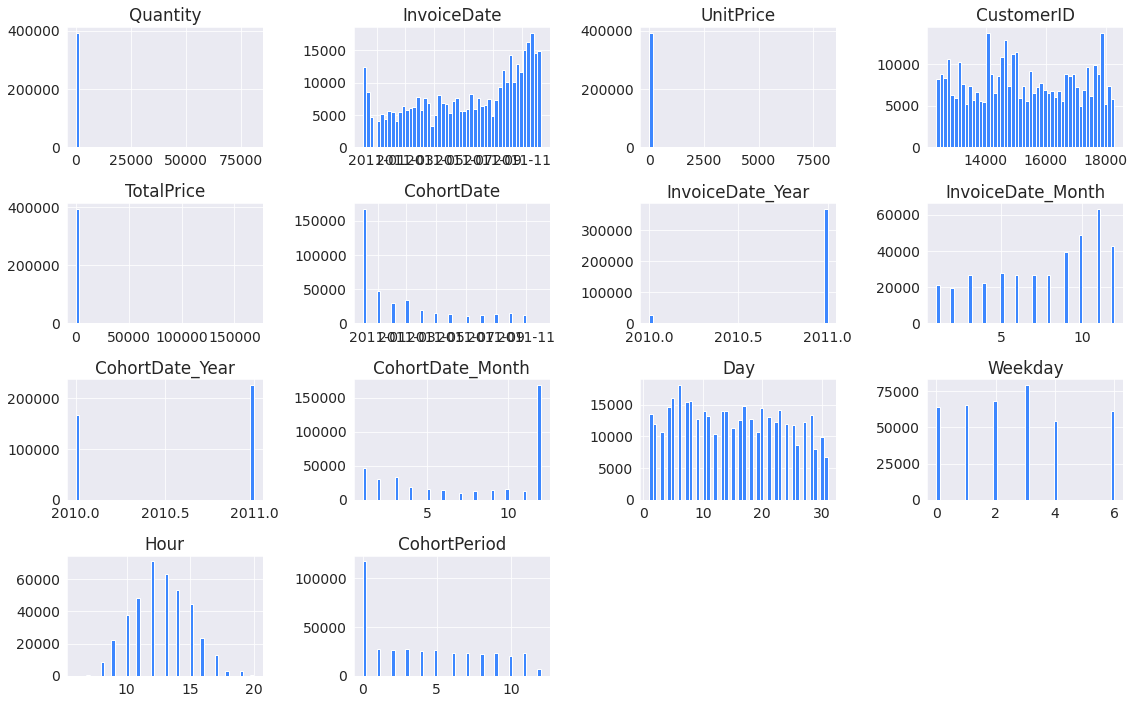

In [101]:

# plot of histogram 
df.hist(bins= 50, figsize= (16,10), color=  '#3d87ff')
# add title
plt.title("Histogram for each numerical attribute.", fontsize= 18)
# to prevent overlapping of text in plot
plt.tight_layout()
plt.show();

In [103]:
def hist_QQ_diagnosis(feature, title):
  """
  histogram and QQ plot of a series."""

  fig, axes = plt.subplots(nrows= 1, ncols= 2,  figsize=(18,6))

  # For distplot
  sns.distplot(feature, ax= axes[0]).set_title(title)
  # For Probability plot 
  _ = sp.stats.probplot(feature,plot=axes[1])
  

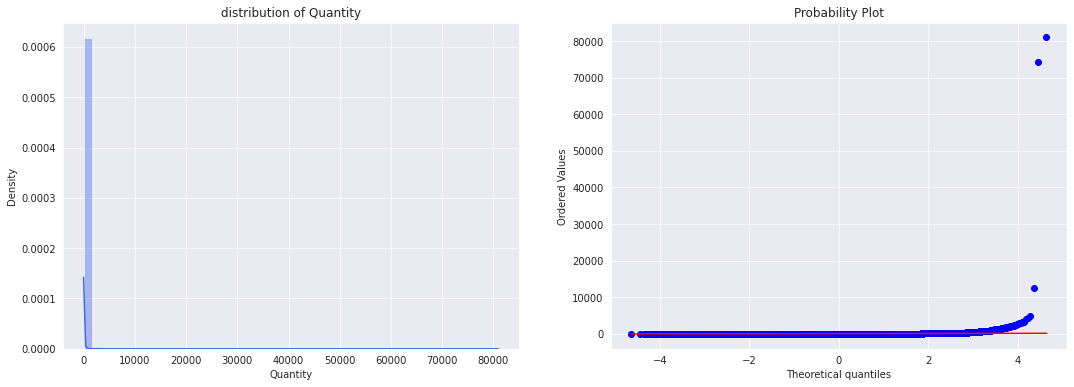

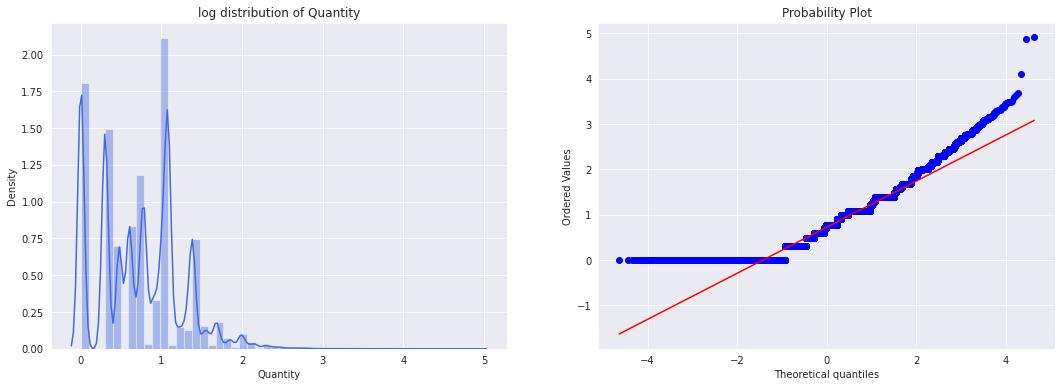

In [104]:
# distribution of Quantity
hist_QQ_diagnosis(df['Quantity'], 'distribution of Quantity')
# log distribution of Quantity
hist_QQ_diagnosis(np.log10(df['Quantity'] + 0.01), "log distribution of Quantity")              # 0.01 is added , because log0 is - inf

**Here we can see that Quantity a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution**

----
**Unit Price**

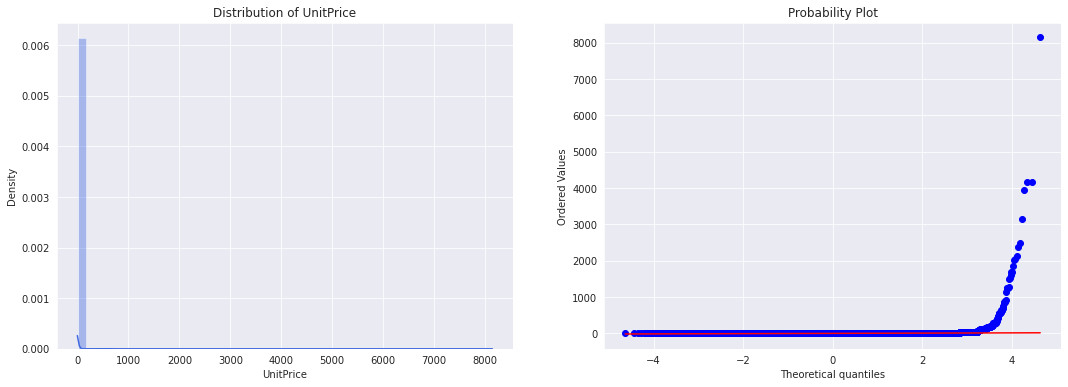

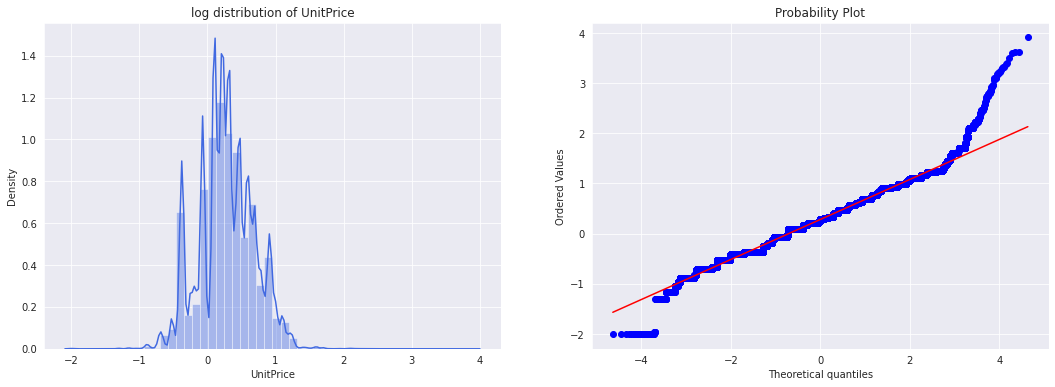

In [105]:
# Distribution of UnitPrice
hist_QQ_diagnosis(df['UnitPrice'], "Distribution of UnitPrice")
# log distribution of UnitPrice
hist_QQ_diagnosis(np.log10(df['UnitPrice'] + 0.01), "log distribution of UnitPrice")



*From the distribution of unit price, we can say that most items have a lower price range.*

----
**TotalPrice**

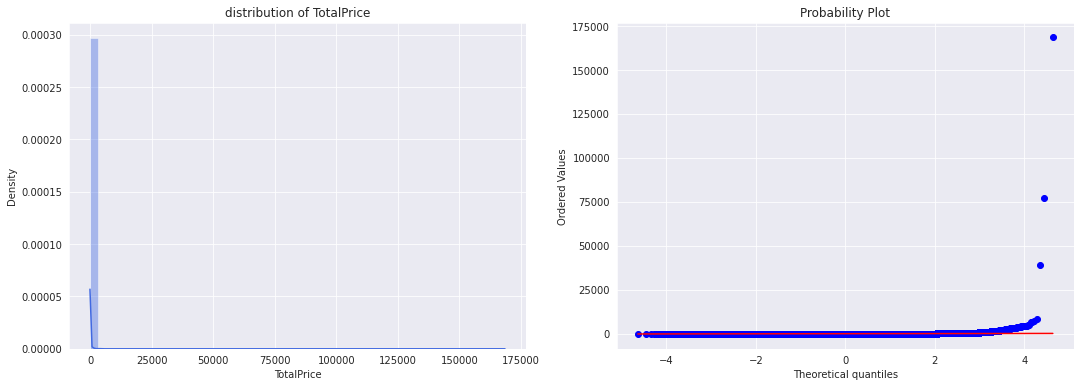

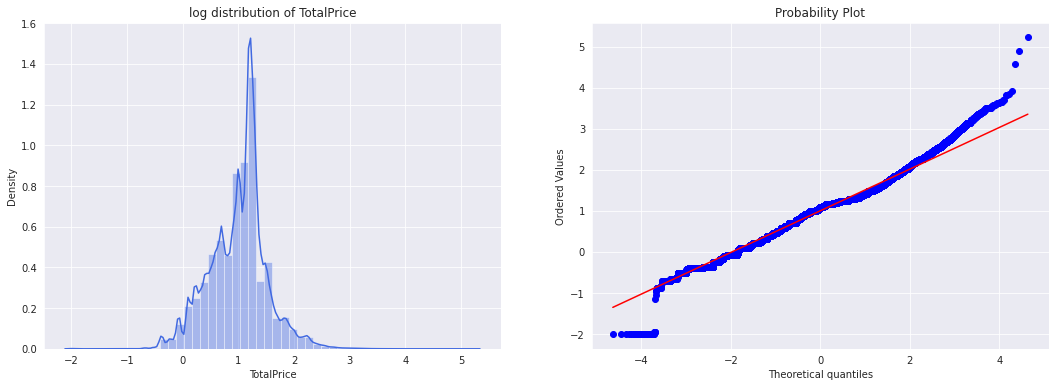

In [106]:
# distribution of TotalPrice
hist_QQ_diagnosis(df['TotalPrice'], "distribution of TotalPrice")
# log distribution of TotalPrice
hist_QQ_diagnosis(np.log10(df['TotalPrice'] + 0.01), "log distribution of TotalPrice")